In [1]:
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

sns.set_style('whitegrid')
#sns.set_palette("husl")

%matplotlib inline

In [2]:
y9_2012 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2012.csv')
y9_2013 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2013.csv')
# useful
y9_2014 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2014.csv')
y9_2015 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2015.csv')
y9_2016 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2016.csv')
y9_2017 = pd.read_csv('./NAPLAN/naplan_schoolexportYr9_2017.csv')

In [3]:
# import questions, only import the columns: 'Question_number','Description','Syllabus'
question_y9_2012 = pd.read_csv('./NAPLAN_Questions/tabula-Questions Year 9 2012.csv').iloc[:,:3]
question_y9_2012.dropna(inplace = True)
question_y9_2012.reset_index(inplace = True, drop = True)
question_y9_2013 = pd.read_csv('./NAPLAN_Questions/tabula-Questions Year 9 2013.csv').iloc[:,:3]
question_y9_2013.dropna(inplace = True)
question_y9_2013.reset_index(inplace = True, drop = True)
question_y9_2014 = pd.read_csv('./NAPLAN_Questions/tabula-Questions Year 9 2014.csv').iloc[:,:3]
question_y9_2014.dropna(inplace = True)
question_y9_2014.reset_index(inplace = True, drop = True)
question_y9_2015 = pd.read_csv('./NAPLAN_Questions/tabula-Questions Year 9 2015.csv').iloc[:,:3]
question_y9_2015.dropna(inplace = True)
question_y9_2015.reset_index(inplace = True, drop = True)
question_y9_2016 = pd.read_csv('./NAPLAN_Questions/tabula-Questions Year 9 2016.csv').iloc[:,:3]
question_y9_2016.dropna(inplace = True)
question_y9_2016.reset_index(inplace = True, drop = True)
question_y9_2017 = pd.read_csv('./NAPLAN_Questions/tabula-Questions Year 9 2017.csv').iloc[:,:3]
question_y9_2017.dropna(inplace = True)
question_y9_2017.reset_index(inplace = True, drop = True)

** ADD Verbes column**

In [4]:
# create a verb columns
verbs_description = pd.DataFrame(question_y9_2012.Description.str.split(': ',1).tolist(),columns = ['a','b'])
question_y9_2012['Verbs'] = pd.DataFrame(verbs_description.b.str.split(' ',1).tolist(),columns=['Verbs','c']).Verbs

verbs_description = pd.DataFrame(question_y9_2013.Description.str.split(': ',1).tolist(),columns = ['a','b'])
question_y9_2013['Verbs'] = pd.DataFrame(verbs_description.b.str.split(' ',1).tolist(),columns=['Verbs','c']).Verbs

question_y9_2014['Verbs'] = pd.DataFrame(question_y9_2014.Description.str.split(' ',1).tolist(),columns=['Verbs','c']).Verbs

verbs_description = pd.DataFrame(question_y9_2015.Description.str.split(': ',1).tolist(),columns = ['a','b'])
question_y9_2015['Verbs'] = pd.DataFrame(verbs_description.b.str.split(' ',1).tolist(),columns=['Verbs','c']).Verbs

verbs_description = pd.DataFrame(question_y9_2016.Description.str.split(': ',1).tolist(),columns = ['a','b'])
question_y9_2016['Verbs'] = pd.DataFrame(verbs_description.b.str.split(' ',1).tolist(),columns=['Verbs','c']).Verbs

question_y9_2017['Verbs'] = pd.DataFrame(question_y9_2017.Description.str.split(' ',1).tolist(),columns=['Verbs','c']).Verbs

question_y9_2017.head()

,Unnamed: 0,Description,Unnamed: 2,Verbs
0,CA-01,Converts a time from the 24-hour system to the...,MA3-13MG,Converts
1,NC-01,Calculates the percentage of one quantity in r...,MA4-5NA,Calculates
2,CA-02,"Solves a simple rate problem in context, using...",MA3-6NA,Solves
3,NC-02,Expresses a 5-digit number in scientific notation,MA5.1-9MG,Expresses
4,CA-03,Interprets a two-way table to solve a problem,MA4-21SP,Interprets


** Update column name**

In [6]:
columns_name = ['Question_number','Description','Syllabus','Verbs']
question_y9_2012.columns = [c +'_2012' for c in columns_name]
question_y9_2013.columns = [c +'_2013' for c in columns_name]
question_y9_2014.columns = [c +'_2014' for c in columns_name]
question_y9_2015.columns = [c +'_2015' for c in columns_name]
question_y9_2016.columns = [c +'_2016' for c in columns_name]
question_y9_2017.columns = [c +'_2017' for c in columns_name]

** Update 2012 Syllabus column**

In [7]:
# year 2012 has a different syllabus. replace the new syllabus to it.
syllabus_dict_2012 = {'DS3.1':'MA3-18SP', 'DS4.1':"MA4-19SP",
                      'DS4.2':'MA4-20SP', 'MS3.1': 'MA3-9MG',
                      'MS3.2':'MA3-10MG', 'MS3.5':'MA3-13MG',
                      'MS4.1':'MA4-12MG', 'MS4.2':'MA3-13MG',
                      'MS4.3':'MA4-15MG', 'MS5.1.1':'MA5.1-8MG',
                      'NS2.4':'MA2-7NA',  'NS3.3':'MA3-6NA',
                      'NS3.4':'MA3-7NA', 
                      'NS3.5':'MA3-19SP','NS4.1':'MA4-4NA',
                      'NS4.3':'MA4-5NA', 'NS4.4':'MA4-21SP',
                      'PAS3.1A':'MA3-8NA', 'PAS3.1B':'MA3-8NA',
                      'PAS4.1':"MA4-8NA",
                      'PAS4.2' :'MA3-8NA','PAS4.3':'MA5.2-6NA',
                      'PAS4.4':'MA4-10NA',
                      'PAS5.2.2':'MA5.2-8NA','PAS5.3.5':'MA5.3-4NA',
                      'SGS2.1':'MA2-14MG', 'SGS2.3':'MA2-17MG',
                      'SGS3.1':'MA3-14MG' ,'SGS3.2A':'MA3-15MG' , 
                      'SGS3.3':'MA3-17MG' ,'SGS4.2':'MA4-18MG',
                      'SGS4.3':'MA4-17MG','SGS4.4':'MA4-17MG'}

question_y9_2012['Syllabus_2012'] = question_y9_2012.Syllabus_2012.apply(syllabus_dict_2012.get)


**Replace the Question name with Syllabus and merge the Questions with same Syllabus **

In [8]:
verbs = pd.DataFrame(columns= ['2012','2013','2014','2015','2016','2017'])
verbs

,2012,2013,2014,2015,2016,2017


## 2012

In [9]:
X_y9_2012 = y9_2012[['SRN','NM9(C1)', 'NM9(NC1)', 'NM9(C2)', 'NM9(NC2)', 'NM9(C3)', 
                     'NM9(NC3)', 'NM9(NC4)', 'NM9(C4)', 'NM9(NC5)', 'NM9(C5)', 
                     'NM9(NC6)', 'NM9(C6)', 'NM9(NC7)', 'NM9(C7)', 'NM9(NC8)', 
                     'NM9(C8)', 'NM9(C9)', 'NM9(NC9)', 'NM9(NC10)', 'NM9(C10)', 
                     'NM9(NC11)', 'NM9(C11)', 'NM9(C12)', 'NM9(NC12)', 'NM9(NC13)', 
                     'NM9(C13)', 'NM9(C14)', 'NM9(NC14)', 'NM9(NC15)', 'NM9(C15)', 
                     'NM9(NC16)', 'NM9(C16)', 'NM9(NC17)', 'NM9(C17)', 'NM9(NC18)', 
                     'NM9(C18)', 'NM9(C19)', 'NM9(NC19)', 'NM9(NC20)', 'NM9(C20)', 
                     'NM9(NC21)', 'NM9(C21)', 'NM9(C22)', 'NM9(NC22)', 'NM9(C23)', 
                     'NM9(NC23)', 'NM9(C24)', 'NM9(NC24)', 'NM9(C25)', 'NM9(NC25)', 
                     'NM9(NC26)', 'NM9(C26)', 'NM9(C27)', 'NM9(NC27)', 'NM9(NC28)', 
                     'NM9(C28)', 'NM9(NC29)', 'NM9(C29)', 'NM9(NC30)', 
                     'NM9(C30)', 'NM9(C31)', 'NM9(NC31)', 'NM9(NC32)', 'NM9(C32)'
                    ]].set_index('SRN').dropna()
X_y9_2012_v = X_y9_2012.copy()

column_name = pd.Series(X_y9_2012.columns)
column_name = column_name.str.replace('NM9\(','')
column_name = column_name.str.replace('\)','')
df2012_1 = pd.DataFrame(column_name,columns=['Q'])

question_y9_2012.Question_number_2012 = question_y9_2012.Question_number_2012.str.replace('-','')
question_y9_2012.Question_number_2012 = question_y9_2012.Question_number_2012.str.replace('A0','')
question_y9_2012.Question_number_2012 = question_y9_2012.Question_number_2012.str.replace('C0','C')
question_y9_2012.Question_number_2012 = question_y9_2012.Question_number_2012.str.replace('A','')

df2012_2 = pd.merge(df2012_1, question_y9_2012, left_on = 'Q', 
                    right_on = 'Question_number_2012',
        how = 'outer')

In [10]:
X_y9_2012.columns = df2012_2.Syllabus_2012
new_X_y9_2012 = X_y9_2012.T.reset_index().groupby(['Syllabus_2012']).apply(np.mean).T
new_X_y9_2012.head()

Syllabus_2012,MA2-14MG,MA2-17MG,MA2-7NA,MA3-10MG,MA3-13MG,MA3-14MG,MA3-15MG,MA3-17MG,MA3-18SP,MA3-19SP,...,MA4-18MG,MA4-19SP,MA4-20SP,MA4-4NA,MA4-5NA,MA4-8NA,MA5.1-8MG,MA5.2-6NA,MA5.2-8NA,MA5.3-4NA
SRN,,,,,,,,,,,,,,,,,,,,,
428415078,0.5,0.5,1.0,0.0,0.333333,0.666667,1.0,0.0,1.0,0.666667,...,0.0,1.0,1.0,1.0,0.615385,1.0,1.0,0.666667,0.0,1.0
428778791,0.5,1.0,1.0,1.0,0.333333,0.666667,1.0,0.0,1.0,0.666667,...,0.0,1.0,1.0,1.0,0.692308,1.0,1.0,0.666667,0.0,1.0
433786998,0.5,0.5,0.0,1.0,0.000000,0.333333,0.0,0.0,1.0,0.000000,...,0.0,0.0,0.0,1.0,0.230769,0.0,0.0,0.000000,0.0,1.0
433787021,1.0,0.5,1.0,1.0,0.666667,1.000000,1.0,1.0,1.0,0.666667,...,1.0,1.0,0.0,1.0,0.923077,1.0,1.0,1.000000,1.0,1.0
433787048,1.0,1.0,1.0,1.0,0.333333,0.666667,1.0,0.0,1.0,1.000000,...,1.0,1.0,1.0,1.0,0.769231,1.0,0.0,0.666667,0.0,1.0


In [11]:
# rename the column names
X_y9_2012_v.columns = df2012_2.Verbs_2012
# group by for the same verbes
df2012_3 = X_y9_2012_v.T.reset_index().groupby(['Verbs_2012']).apply(np.mean).T
df2012_3.head()


Verbs_2012,Adds,Applies,Calculates,Completes,Converts,Determines,Distinguishes,Divides,Estimates,Finds,...,Locates,Matches,Names,Selects,Solves,Specifies,Substitutes,Uses,Visualises,Writes
SRN,,,,,,,,,,,,,,,,,,,,,
428415078,1.0,0.00,0.727273,0.0,1.0,0.666667,1.0,0.5,1.0,0.285714,...,0.0,1.0,1.0,1.0,0.714286,0.0,1.0,0.0,0.0,1.0
428778791,1.0,0.25,0.818182,1.0,1.0,0.333333,1.0,0.5,1.0,0.428571,...,0.0,1.0,1.0,1.0,0.571429,1.0,1.0,0.5,0.0,1.0
433786998,0.0,0.00,0.181818,0.0,1.0,0.333333,0.0,0.5,1.0,0.142857,...,0.0,1.0,1.0,1.0,0.285714,0.0,0.0,0.0,0.0,0.0
433787021,1.0,0.50,0.909091,1.0,1.0,1.000000,1.0,0.5,1.0,0.714286,...,1.0,1.0,1.0,1.0,0.857143,0.0,0.5,1.0,1.0,1.0
433787048,0.0,1.00,0.818182,1.0,1.0,0.666667,0.0,0.5,1.0,0.428571,...,0.0,1.0,1.0,1.0,0.714286,1.0,0.5,1.0,1.0,1.0


In [13]:
verbs['2012'] = X_y9_2012_v.columns 

In [25]:
#new_X_y9_2012.to_csv('X_y9_2012.csv', header=True, index = True)
#df2012_3.to_csv('X_y9_2012_verbes.csv', header=True, index = True)

## 2013

In [14]:
X_y9_2013 = y9_2013[['SRN','NM9(C1)', 'NM9(NC1)', 'NM9(C2)', 'NM9(NC2)',
                     'NM9(C3)', 'NM9(NC3)', 'NM9(NC4)', 'NM9(C4)', 
                     'NM9(C5)', 'NM9(NC5)', 'NM9(NC6)', 'NM9(C6)', 
                     'NM9(C7)', 'NM9(NC7)', 'NM9(C8)', 'NM9(NC8)', 
                     'NM9(C9)', 'NM9(NC9)', 'NM9(NC10)', 'NM9(C10)',
                     'NM9(C11)', 'NM9(NC11)', 'NM9(C12)', 'NM9(NC12)', 
                     'NM9(NC13)', 'NM9(C13)', 'NM9(NC14)', 'NM9(C14)',
                     'NM9(C15)', 'NM9(NC15)', 'NM9(NC16)', 'NM9(C16)', 
                     'NM9(NC17)', 'NM9(C17)', 'NM9(NC18)', 'NM9(C18)', 
                     'NM9(C19)', 'NM9(NC19)', 'NM9(C20)', 'NM9(NC20)', 
                     'NM9(NC21)', 'NM9(C21)', 'NM9(C22)', 'NM9(NC22)', 
                     'NM9(NC23)', 'NM9(C23)', 'NM9(C24)', 'NM9(NC24)', 
                     'NM9(C25)', 'NM9(NC25)', 'NM9(C26)', 'NM9(NC26)', 
                     'NM9(C27)', 'NM9(NC27)', 'NM9(NC28)', 'NM9(C28)',
                     'NM9(C29)', 'NM9(NC29)', 'NM9(C30)', 'NM9(NC30)',
                     'NM9(NC31)', 'NM9(C31)', 'NM9(NC32)', 'NM9(C32)'
                    ]].set_index('SRN').dropna()
X_y9_2013_v = X_y9_2013.copy()

column_name = pd.Series(X_y9_2013.columns)
column_name = column_name.str.replace('NM9\(','')
column_name = column_name.str.replace('\)','')
df2013_1 = pd.DataFrame(column_name,columns=['Q'])

question_y9_2013.Question_number_2013 = question_y9_2013.Question_number_2013.str.replace('-','')
question_y9_2013.Question_number_2013 = question_y9_2013.Question_number_2013.str.replace('A0','')
question_y9_2013.Question_number_2013 = question_y9_2013.Question_number_2013.str.replace('C0','C')
question_y9_2013.Question_number_2013 = question_y9_2013.Question_number_2013.str.replace('A','')

df2013_2 = pd.merge(df2013_1, question_y9_2013, left_on = 'Q', 
                    right_on = 'Question_number_2013',
        how = 'outer')

In [15]:
X_y9_2013.columns = df2013_2.Syllabus_2013
new_X_y9_2013 = X_y9_2013.T.reset_index().groupby(['Syllabus_2013']).apply(np.mean).T
new_X_y9_2013.head()

Syllabus_2013,MA2-12MG,MA2-17MG,MA2-8NA,MA3-11MG,MA3-14MG,MA3-15MG,MA3-18SP,MA3-19SP,MA3-4NA,MA3-5NA,...,MA4-20SP,MA4-21SP,MA4-5NA,MA4-7NA,MA4-8NA,MA4-9NA,MA5.1-11MG,MA5.1-5NA,MA5.1-8MG,MA5.2-5NA
SRN,,,,,,,,,,,,,,,,,,,,,
432999297,1.0,0.333333,1.0,1.0,0.5,1.0,1.0,0.0,1.0,1.0,...,0.25,0.0,0.833333,0.285714,1.0,0.5,0.0,0.0,0.5,1.0
432999319,1.0,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,0.25,0.0,1.000000,0.428571,0.2,1.0,1.0,1.0,0.0,0.0
428415116,1.0,0.666667,1.0,1.0,0.5,1.0,1.0,1.0,1.0,0.0,...,0.75,1.0,1.000000,0.714286,0.6,0.5,1.0,0.0,1.0,0.0
433787030,1.0,0.333333,1.0,0.0,0.5,1.0,1.0,1.0,1.0,1.0,...,0.50,1.0,0.833333,0.428571,0.2,0.0,0.0,1.0,0.0,0.0
400004340,1.0,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.75,0.0,0.833333,0.714286,0.8,1.0,0.0,1.0,0.5,0.0


In [16]:
# rename the column names
X_y9_2013_v.columns = df2013_2.Verbs_2013
# group by for the same verbes
df2013_3 = X_y9_2013_v.T.reset_index().groupby(['Verbs_2013']).apply(np.mean).T
df2013_3.head()


Verbs_2013,Applies,Calculate,Calculates,Combines,Counts,Determines,Distinguishes,Estimates,Expresses,Finds,...,Increases,Inserts,Interprets,Locates,Matches,Multiplies,Reads,Solves,Totals,Uses
SRN,,,,,,,,,,,,,,,,,,,,,
432999297,0.5,0.0,0.666667,0.0,1.0,0.50,1.0,1.0,1.0,0.357143,...,1.0,0.0,0.4,1.0,0.0,1.0,1.0,0.625,1.0,0.666667
432999319,0.0,1.0,0.416667,1.0,0.0,0.25,0.0,1.0,1.0,0.571429,...,1.0,1.0,0.2,1.0,0.0,1.0,1.0,0.375,1.0,0.333333
428415116,0.5,1.0,1.000000,1.0,1.0,0.75,0.0,1.0,1.0,0.642857,...,1.0,1.0,0.6,1.0,1.0,1.0,1.0,0.750,0.0,0.666667
433787030,0.5,0.0,0.583333,1.0,1.0,0.00,0.0,1.0,1.0,0.285714,...,1.0,1.0,0.2,0.0,1.0,1.0,1.0,0.250,1.0,0.333333
400004340,0.5,1.0,0.750000,1.0,1.0,0.75,1.0,1.0,0.0,0.785714,...,1.0,1.0,0.6,1.0,1.0,1.0,1.0,0.625,1.0,0.666667


In [17]:
X_y9_2013_v.columns.value_counts()

Finds            14
Calculates       12
Solves            8
Interprets        5
Determines        4
Uses              3
Identifies        2
Applies           2
Matches           1
Inserts           1
Combines          1
Calculate         1
Locates           1
Estimates         1
Follows           1
Distinguishes     1
Totals            1
Reads             1
Increases         1
Multiplies        1
Counts            1
Expresses         1
Name: Verbs_2013, dtype: int64

In [20]:
verbs['2013'] = X_y9_2013_v.columns 

In [19]:
#new_X_y9_2013.to_csv('X_y9_2013.csv', header=True, index = True)
#df2013_3.to_csv('X_y9_2013_verbes.csv', header=True, index = True)

## 2014

In [21]:
X_y9_2014 = y9_2014[['SRN','NM9(NC1)', 'NM9(C1)', 'NM9(NC2)', 'NM9(C2)', 'NM9(NC3)',
                     'NM9(C3)', 'NM9(C4)', 'NM9(NC4)', 'NM9(NC5)', 'NM9(C5)', 
                     'NM9(C6)', 'NM9(NC6)', 'NM9(C7)', 'NM9(NC7)', 'NM9(NC8)',
                     'NM9(C8)', 'NM9(NC9)', 'NM9(C9)', 'NM9(NC10)', 'NM9(C10)',
                     'NM9(C11)', 'NM9(NC11)', 'NM9(C12)', 'NM9(NC12)', 'NM9(NC13)', 
                     'NM9(C13)', 'NM9(C14)', 'NM9(NC14)', 'NM9(C15)', 'NM9(NC15)', 
                     'NM9(C16)', 'NM9(NC16)', 'NM9(NC17)', 'NM9(C17)', 'NM9(NC18)', 
                     'NM9(C18)', 'NM9(C19)', 'NM9(NC19)', 'NM9(C20)', 'NM9(NC20)', 
                     'NM9(NC21)', 'NM9(C21)', 'NM9(C22)', 'NM9(NC22)', 'NM9(NC23)',
                     'NM9(C23)', 'NM9(NC24)', 'NM9(C24)', 'NM9(C25)', 'NM9(NC25)', 
                     'NM9(NC26)', 'NM9(C26)', 'NM9(C27)', 'NM9(NC27)', 'NM9(NC28)', 
                     'NM9(C28)', 'NM9(C29)', 'NM9(NC29)', 'NM9(NC30)',
                     'NM9(C30)', 'NM9(C31)', 'NM9(NC31)', 'NM9(NC32)', 'NM9(C32)'
                    ]].set_index('SRN').dropna()
X_y9_2014_v = X_y9_2014.copy()

column_name = pd.Series(X_y9_2014.columns)
column_name = column_name.str.replace('NM9\(','')
column_name = column_name.str.replace('\)','')
df2014_1 = pd.DataFrame(column_name,columns=['Q'])

question_y9_2014.Question_number_2014 = question_y9_2014.Question_number_2014.str.replace('-','')
question_y9_2014.Question_number_2014 = question_y9_2014.Question_number_2014.str.replace('A0','')
question_y9_2014.Question_number_2014 = question_y9_2014.Question_number_2014.str.replace('C0','C')
question_y9_2014.Question_number_2014 = question_y9_2014.Question_number_2014.str.replace('A','')

df2014_2 = pd.merge(df2014_1, question_y9_2014, left_on = 'Q', 
                    right_on = 'Question_number_2014',
        how = 'outer')

In [22]:
X_y9_2014.columns = df2014_2.Syllabus_2014
new_X_y9_2014 = X_y9_2014.T.reset_index().groupby(['Syllabus_2014']).apply(np.mean).T
new_X_y9_2014.head()

Syllabus_2014,MA2-4NA,MA3-11MG,MA3-14MG,MA3-15MG,MA3-18SP,MA3-4NA,MA3-5NA,MA3-6NA,MA3-7NA,MA3-9MG,...,MA4-13MG,MA4-15MG,MA4-17MG,MA4-21SP,MA4-4NA,MA4-5NA,MA4-7NA,MA4-8NA,MA5.1-11MG,MA5.1-5NA
SRN,,,,,,,,,,,,,,,,,,,,,
436530790,1.0,0.0,1.0,1.0,1.0,1.0,0.75,0.75,1.0,1.000000,...,0.000000,1.0,0.750,1.0,0.5,0.363636,0.8,1.00,1.0,0.666667
441546149,0.0,1.0,1.0,1.0,1.0,1.0,1.00,0.75,1.0,0.666667,...,0.000000,1.0,0.750,1.0,0.5,0.818182,0.8,1.00,1.0,1.000000
432640256,1.0,1.0,1.0,1.0,1.0,1.0,0.75,0.50,0.5,0.666667,...,0.333333,0.0,0.625,1.0,1.0,0.363636,0.6,0.75,1.0,0.666667
434220173,0.0,1.0,1.0,1.0,1.0,1.0,0.75,0.00,0.5,0.666667,...,0.000000,1.0,0.250,1.0,0.5,0.363636,0.0,0.50,1.0,0.666667
431672294,0.0,1.0,1.0,1.0,1.0,1.0,1.00,0.75,1.0,0.666667,...,0.333333,0.0,1.000,1.0,0.0,0.727273,0.8,1.00,1.0,1.000000


In [23]:
# rename the column names
X_y9_2014_v.columns = df2014_2.Verbs_2014
# group by for the same verbes
df2014_3 = X_y9_2014_v.T.reset_index().groupby(['Verbs_2014']).apply(np.mean).T
df2014_3.head()


Verbs_2014,Applies,Calculates,Changes,Compares,Converts,Corrects,Determines,Divides,Evaluates,Finds,...,Interprets,Locates,Matches,Predicts,Reads,Recognises,Selects,Solves,Uses,Writes
SRN,,,,,,,,,,,,,,,,,,,,,
436530790,1.0,0.142857,1.0,0.0,1.0,1.0,0.666667,1.0,1.0,1.0,...,0.333333,1.0,1.0,1.0,1.0,1.0,1.0,0.166667,0.666667,1.0
441546149,1.0,0.571429,1.0,0.0,1.0,1.0,0.666667,1.0,1.0,1.0,...,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,0.833333,1.000000,0.0
432640256,1.0,0.428571,1.0,1.0,0.0,1.0,0.666667,0.0,1.0,1.0,...,1.000000,1.0,1.0,1.0,1.0,0.0,1.0,0.166667,0.333333,0.0
434220173,1.0,0.428571,1.0,0.0,1.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,1.0,1.0,1.0,0.0,1.0,0.5,0.333333,0.000000,0.0
431672294,1.0,0.571429,1.0,0.0,1.0,1.0,0.666667,1.0,1.0,1.0,...,0.666667,1.0,1.0,1.0,0.0,1.0,1.0,0.833333,1.000000,1.0


In [24]:
#new_X_y9_2014.to_csv('X_y9_2014.csv', header=True, index = True)
#df2014_3.to_csv('X_y9_2014_verbes.csv', header=True, index = True)

In [25]:
verbs['2014'] = X_y9_2014_v.columns 

## 2015

In [26]:
X_y9_2015 = y9_2015[['SRN','NM9(NC1)', 'NM9(C1)', 'NM9(C2)', 'NM9(NC2)', 'NM9(NC3)', 
                     'NM9(C3)', 'NM9(NC4)', 'NM9(C4)', 'NM9(C5)', 'NM9(NC5)', 
                     'NM9(NC6)', 'NM9(C6)', 'NM9(C7)', 'NM9(NC7)', 'NM9(C8)',
                     'NM9(NC8)', 'NM9(NC9)', 'NM9(C9)', 'NM9(C10)', 'NM9(NC10)', 
                     'NM9(C11)', 'NM9(NC11)', 'NM9(NC12)', 'NM9(C12)', 'NM9(NC13)',
                     'NM9(C13)', 'NM9(NC14)', 'NM9(C14)', 'NM9(NC15)', 'NM9(C15)', 
                     'NM9(NC16)', 'NM9(C16)', 'NM9(NC17)', 'NM9(C17)', 'NM9(NC18)', 
                     'NM9(C18)', 'NM9(C19)', 'NM9(NC19)', 'NM9(NC20)', 'NM9(C20)', 
                     'NM9(NC21)', 'NM9(C21)', 'NM9(C22)', 'NM9(NC22)', 'NM9(C23)', 
                     'NM9(NC23)', 'NM9(NC24)', 'NM9(C24)', 'NM9(NC25)', 'NM9(C25)', 
                     'NM9(C26)', 'NM9(NC26)', 'NM9(C27)', 'NM9(NC27)', 'NM9(NC28)', 
                     'NM9(C28)', 'NM9(C29)', 'NM9(NC29)', 'NM9(C30)', 
                     'NM9(NC30)', 'NM9(C31)', 'NM9(NC31)', 'NM9(NC32)', 'NM9(C32)'
                    ]].set_index('SRN').dropna()
X_y9_2015_v = X_y9_2015.copy()

column_name = pd.Series(X_y9_2015.columns)
column_name = column_name.str.replace('NM9\(','')
column_name = column_name.str.replace('\)','')
df2015_1 = pd.DataFrame(column_name,columns=['Q'])

question_y9_2015.Question_number_2015 = question_y9_2015.Question_number_2015.str.replace('-','')
question_y9_2015.Question_number_2015 = question_y9_2015.Question_number_2015.str.replace('A0','')
question_y9_2015.Question_number_2015 = question_y9_2015.Question_number_2015.str.replace('C0','C')
question_y9_2015.Question_number_2015 = question_y9_2015.Question_number_2015.str.replace('A','')

df2015_2 = pd.merge(df2015_1, question_y9_2015, left_on = 'Q', 
                    right_on = 'Question_number_2015',
        how = 'outer')

In [27]:
X_y9_2015.columns = df2015_2.Syllabus_2015
new_X_y9_2015 = X_y9_2015.T.reset_index().groupby(['Syllabus_2015']).apply(np.mean).T
new_X_y9_2015.head()

Syllabus_2015,MA2-11MG,MA2-13MG,MA2-15MG,MA3-10MG,MA3-11MG,MA3-13MG,MA3-14MG,MA3-15MG,MA3-16MG,MA3-19SP,...,MA4-17MG,MA4-19SP,MA4-21SP,MA4-4NA,MA4-5NA,MA4-6NA,MA4-7NA,MA4-8NA,MA5.1-5NA,MA5.2-8NA
SRN,,,,,,,,,,,,,,,,,,,,,
436607369,0.666667,0.0,0.666667,0.0,1.0,1.0,1.0,0.5,0.0,1.0,...,0.666667,1.0,1.0,1.00,0.666667,0.0,0.4,0.714286,1.00,1.0
429152038,1.000000,1.0,0.666667,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0.666667,1.0,1.0,0.75,0.333333,0.0,0.2,0.428571,0.50,0.0
434564981,1.000000,1.0,1.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.666667,1.0,1.0,1.00,1.000000,1.0,0.8,0.714286,0.75,1.0
428846257,0.666667,1.0,1.000000,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,0.666667,1.0,1.0,1.00,1.000000,0.0,1.0,0.714286,1.00,1.0
429541042,1.000000,1.0,1.000000,0.0,0.0,1.0,1.0,0.5,1.0,1.0,...,0.333333,1.0,1.0,1.00,1.000000,0.0,0.8,0.428571,0.50,1.0


In [28]:
df2015_2.loc[62].Verbs_2015 = 'Solves'

In [29]:
X_y9_2015_v.columns

Index([u'NM9(NC1)', u'NM9(C1)', u'NM9(C2)', u'NM9(NC2)', u'NM9(NC3)',
       u'NM9(C3)', u'NM9(NC4)', u'NM9(C4)', u'NM9(C5)', u'NM9(NC5)',
       u'NM9(NC6)', u'NM9(C6)', u'NM9(C7)', u'NM9(NC7)', u'NM9(C8)',
       u'NM9(NC8)', u'NM9(NC9)', u'NM9(C9)', u'NM9(C10)', u'NM9(NC10)',
       u'NM9(C11)', u'NM9(NC11)', u'NM9(NC12)', u'NM9(C12)', u'NM9(NC13)',
       u'NM9(C13)', u'NM9(NC14)', u'NM9(C14)', u'NM9(NC15)', u'NM9(C15)',
       u'NM9(NC16)', u'NM9(C16)', u'NM9(NC17)', u'NM9(C17)', u'NM9(NC18)',
       u'NM9(C18)', u'NM9(C19)', u'NM9(NC19)', u'NM9(NC20)', u'NM9(C20)',
       u'NM9(NC21)', u'NM9(C21)', u'NM9(C22)', u'NM9(NC22)', u'NM9(C23)',
       u'NM9(NC23)', u'NM9(NC24)', u'NM9(C24)', u'NM9(NC25)', u'NM9(C25)',
       u'NM9(C26)', u'NM9(NC26)', u'NM9(C27)', u'NM9(NC27)', u'NM9(NC28)',
       u'NM9(C28)', u'NM9(C29)', u'NM9(NC29)', u'NM9(C30)', u'NM9(NC30)',
       u'NM9(C31)', u'NM9(NC31)', u'NM9(NC32)', u'NM9(C32)'],
      dtype='object')

In [30]:
# rename the column names
X_y9_2015_v.columns = df2015_2.Verbs_2015
# group by for the same verbes
df2015_3 = X_y9_2015_v.T.reset_index().groupby(['Verbs_2015']).apply(np.mean).T
df2015_3.head()


Verbs_2015,Applies,Calculates,Compares,Converts,Determines,Estimates,Evaluates,Expresses,Identifies,Infers,Interprets,Matches,Rearranges,Selects,Simplifies,Solves,Substitutes,Uses
SRN,,,,,,,,,,,,,,,,,,
436607369,0.5,0.769231,0.0,0.0,0.5,0.333333,1.0,0.5,0.6875,1.0,1.0,0.0,1.0,0.5,1.0,0.428571,1.0,0.666667
429152038,0.0,0.769231,0.0,1.0,0.5,1.000000,1.0,0.5,0.6875,1.0,0.5,1.0,0.0,1.0,0.0,0.428571,0.0,0.500000
434564981,0.5,0.769231,1.0,1.0,1.0,1.000000,1.0,1.0,0.8125,1.0,1.0,1.0,1.0,1.0,1.0,0.714286,1.0,0.666667
428846257,0.5,0.692308,0.0,1.0,0.5,0.333333,1.0,1.0,0.9375,1.0,1.0,1.0,1.0,1.0,1.0,0.428571,1.0,0.833333
429541042,0.5,0.615385,0.0,1.0,0.5,0.666667,1.0,1.0,0.7500,1.0,1.0,1.0,0.0,0.5,0.5,0.142857,1.0,0.833333


In [31]:
df2015_3.columns

Index([u'Applies', u'Calculates', u'Compares', u'Converts', u'Determines',
       u'Estimates', u'Evaluates', u'Expresses', u'Identifies', u'Infers',
       u'Interprets', u'Matches', u'Rearranges', u'Selects', u'Simplifies',
       u'Solves', u'Substitutes', u'Uses'],
      dtype='object', name=u'Verbs_2015')

In [48]:
#new_X_y9_2015.to_csv('X_y9_2015.csv', header=True, index = True)
#df2015_3.to_csv('X_y9_2015_verbes.csv', header=True, index = True)

In [32]:
verbs['2015'] = X_y9_2015_v.columns 

## 2016

In [33]:
X_y9_2016 = y9_2016[['SRN','NM9(NC1)', 'NM9(C1)', 'NM9(NC2)', 'NM9(C2)', 'NM9(NC3)', 
                     'NM9(C3)', 'NM9(NC4)', 'NM9(C4)', 'NM9(C5)', 'NM9(NC5)', 
                     'NM9(C6)', 'NM9(NC6)', 'NM9(NC7)', 'NM9(C7)', 'NM9(C8)', 
                     'NM9(NC8)', 'NM9(C9)', 'NM9(NC9)', 'NM9(NC10)', 'NM9(C10)',
                     'NM9(C11)', 'NM9(NC11)', 'NM9(C12)', 'NM9(NC12)', 'NM9(NC13)', 
                     'NM9(C13)', 'NM9(NC14)', 'NM9(C14)', 'NM9(NC15)', 'NM9(C15)',
                     'NM9(C16)', 'NM9(NC16)', 'NM9(NC17)', 'NM9(C17)', 'NM9(C18)', 
                     'NM9(NC18)', 'NM9(NC19)', 'NM9(C19)', 'NM9(C20)', 'NM9(NC20)', 
                     'NM9(C21)', 'NM9(NC21)', 'NM9(NC22)', 'NM9(C22)', 'NM9(NC23)', 
                     'NM9(C23)', 'NM9(NC24)', 'NM9(C24)', 'NM9(NC25)', 'NM9(C25)', 
                     'NM9(NC26)', 'NM9(C26)', 'NM9(C27)', 'NM9(NC27)', 'NM9(C28)',
                     'NM9(NC28)', 'NM9(NC29)', 'NM9(C29)', 'NM9(NC30)', 
                     'NM9(C30)', 'NM9(NC31)', 'NM9(C31)', 'NM9(NC32)', 'NM9(C32)'
                    ]].set_index('SRN').dropna()
X_y9_2016_v = X_y9_2016.copy()

column_name = pd.Series(X_y9_2016.columns)
column_name = column_name.str.replace('NM9\(','')
column_name = column_name.str.replace('\)','')
df2016_1 = pd.DataFrame(column_name,columns=['Q'])

question_y9_2016.Question_number_2016 = question_y9_2016.Question_number_2016.str.replace('-','')
question_y9_2016.Question_number_2016 = question_y9_2016.Question_number_2016.str.replace('A0','')
question_y9_2016.Question_number_2016 = question_y9_2016.Question_number_2016.str.replace('C0','C')
question_y9_2016.Question_number_2016 = question_y9_2016.Question_number_2016.str.replace('A','')

df2016_2 = pd.merge(df2016_1, question_y9_2016, left_on = 'Q', 
                    right_on = 'Question_number_2016',
        how = 'outer')

In [34]:
X_y9_2016.columns = df2016_2.Syllabus_2016
new_X_y9_2016 = X_y9_2016.T.reset_index().groupby(['Syllabus_2016']).apply(np.mean).T
new_X_y9_2016.head()

Syllabus_2016,MA2-13MG,MA2-6NA,MA3-11MG,MA3-15MG,MA3-16MG,MA3-17MG,MA3-4NA,MA3-5NA,MA3-7NA,MA3-8NA,...,MA5.1-6NA,MA5.1-7NA,MA5.1-8MG,MA5.1-9MG,MA5.2-17SP,MA5.2-5NA,MA5.2-6NA,MA5.2-8NA,MA5.3-13MG,MA5.3-4NA
SRN,,,,,,,,,,,,,,,,,,,,,
436556471,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
434564891,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
428415167,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
432439755,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0,...,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
432413110,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.5,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [35]:
# rename the column names
X_y9_2016_v.columns = df2016_2.Verbs_2016
# group by for the same verbes
df2016_3 = X_y9_2016_v.T.reset_index().groupby(['Verbs_2016']).apply(np.mean).T
df2016_3.head()


Verbs_2016,Adds,Applies,Calculates,Classifies,Compares,Converts,Describes,Determines,Divides,Estimates,Evaluates,Expresses,Identifies,Interprets,Multiplies,Represents,Selects,Solves,Uses
SRN,,,,,,,,,,,,,,,,,,,
436556471,1.0,0.5,0.642857,0.0,0.0,0.50,1.0,0.666667,0.0,1.0,0.0,1.0,0.875,0.666667,1.0,1.0,0.75,0.333333,0.857143
434564891,1.0,0.5,0.785714,1.0,1.0,0.75,0.0,1.000000,1.0,1.0,1.0,1.0,0.750,0.666667,1.0,1.0,1.00,0.333333,1.000000
428415167,1.0,0.5,0.928571,0.0,1.0,0.75,1.0,0.833333,1.0,1.0,1.0,1.0,0.875,1.000000,1.0,1.0,1.00,0.333333,1.000000
432439755,1.0,0.5,0.785714,0.0,1.0,0.50,1.0,0.833333,1.0,1.0,1.0,1.0,0.750,0.333333,1.0,1.0,0.50,0.333333,0.857143
432413110,0.0,0.0,0.142857,0.0,0.0,0.50,0.0,0.333333,0.0,1.0,1.0,1.0,0.250,0.666667,0.0,1.0,0.50,0.000000,0.428571


In [36]:
#new_X_y9_2016.to_csv('X_y9_2016.csv', header=True, index = True)
#df2016_3.to_csv('X_y9_2016_verbes.csv', header=True, index = True)

In [37]:
verbs['2016'] = X_y9_2016_v.columns 

## 2017

In [38]:
X_y9_2017 = y9_2017[['SRN','NM9(C1)', 'NM9(NC1)', 'NM9(NC2)', 'NM9(C2)', 
                     'NM9(C3)', 'NM9(NC3)', 'NM9(NC4)', 'NM9(C4)', 'NM9(NC5)', 
                     'NM9(C5)', 'NM9(C6)', 'NM9(NC6)', 'NM9(NC7)', 'NM9(C7)', 
                     'NM9(NC8)', 'NM9(C8)', 'NM9(C9)', 'NM9(C10)', 'NM9(C11)', 
                     'NM9(C12)', 'NM9(C13)', 'NM9(C14)', 'NM9(C15)', 'NM9(C16)', 
                     'NM9(C17)', 'NM9(C18)', 'NM9(C19)', 'NM9(C20)', 'NM9(C21)', 
                     'NM9(C22)', 'NM9(C23)', 'NM9(C24)', 'NM9(C25)', 'NM9(C26)', 
                     'NM9(C27)', 'NM9(C28)', 'NM9(C29)', 'NM9(C30)', 'NM9(C31)', 
                     'NM9(C32)', 'NM9(C33)', 'NM9(C34)', 'NM9(C35)', 'NM9(C36)', 
                     'NM9(C37)', 'NM9(C38)', 'NM9(C39)', 'NM9(C40)'
                    ]].set_index('SRN').dropna()
X_y9_2017_v = X_y9_2017.copy()

column_name = pd.Series(X_y9_2017.columns)
column_name = column_name.str.replace('NM9\(','')
column_name = column_name.str.replace('\)','')
df2017_1 = pd.DataFrame(column_name,columns=['Q'])

question_y9_2017.Question_number_2017 = question_y9_2017.Question_number_2017.str.replace('-','')
question_y9_2017.Question_number_2017 = question_y9_2017.Question_number_2017.str.replace('A0','')
question_y9_2017.Question_number_2017 = question_y9_2017.Question_number_2017.str.replace('C0','C')
question_y9_2017.Question_number_2017 = question_y9_2017.Question_number_2017.str.replace('A','')

df2017_2 = pd.merge(df2017_1, question_y9_2017, left_on = 'Q', 
                    right_on = 'Question_number_2017',
        how = 'outer')

In [39]:
X_y9_2017.columns = df2017_2.Syllabus_2017
new_X_y9_2017 = X_y9_2017.T.reset_index().groupby(['Syllabus_2017']).apply(np.mean).T
new_X_y9_2017.head()

Syllabus_2017,MA3-11MG,MA3-13MG,MA3-15MG,MA3-18SP,MA3-19SP,MA3-6NA,MA3-7NA,MA3-8NA,MA3-9MG,MA4-10NA,...,MA4-4NA,MA4-5NA,MA4-6NA,MA4-7NA,MA4-8NA,MA4-9NA,MA5.1-12SP,MA5.1-4NA,MA5.1-6NA,MA5.1-9MG
SRN,,,,,,,,,,,,,,,,,,,,,
433786980,1.0,1.0,1.0,1.0,1.0,1.000000,1.0,1.0,1.000000,1.0,...,0.5,0.8,1.0,1.0,1.0,0.0,1.0,1.0,0.5,1.0
433787013,1.0,1.0,1.0,0.0,1.0,1.000000,0.8,0.5,1.000000,1.0,...,0.5,0.4,0.0,1.0,0.5,0.0,1.0,1.0,1.0,1.0
429541000,0.0,0.5,0.0,0.0,1.0,0.000000,0.6,0.5,0.333333,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.5,0.0
432413128,0.0,0.5,0.0,1.0,0.0,0.000000,0.0,0.5,0.333333,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0
434665116,0.0,0.5,0.0,0.0,0.0,0.333333,0.0,1.0,0.666667,0.0,...,0.0,0.4,0.0,1.0,1.0,0.0,1.0,0.0,0.5,1.0


In [40]:
# rename the column names
X_y9_2017_v.columns = df2017_2.Verbs_2017
# group by for the same verbes
df2017_3 = X_y9_2017_v.T.reset_index().groupby(['Verbs_2017']).apply(np.mean).T
df2017_3.head()


Verbs_2017,Calculates,Chooses,Converts,Describes,Determines,Evaluates,Expresses,Identifies,Interprets,Represents,Rounds,Solves,Subtracts,Uses
SRN,,,,,,,,,,,,,,
433786980,0.888889,1.0,0.75,1.0,0.833333,0.5,1.0,0.8,1.00,1.0,1.0,1.000000,1.0,1.00
433787013,0.444444,1.0,0.75,1.0,0.500000,0.5,1.0,0.8,0.75,1.0,1.0,0.666667,1.0,1.00
429541000,0.111111,0.0,0.50,1.0,0.166667,0.0,0.0,0.2,0.50,1.0,0.0,0.000000,0.5,0.00
432413128,0.111111,0.0,0.25,0.5,0.166667,0.0,1.0,0.2,0.50,0.0,0.0,0.000000,0.0,0.25
434665116,0.222222,1.0,0.25,0.5,0.333333,0.0,1.0,0.4,0.25,0.0,1.0,0.166667,0.0,0.75


In [41]:
#new_X_y9_2017.to_csv('X_y9_2017.csv', header=True, index = True)
#df2017_3.to_csv('X_y9_2017_verbes.csv', header=True, index = True)

In [42]:
verbs['2017'] = list(X_y9_2017_v.columns) + [np.nan] *16
verbs.head()

,2012,2013,2014,2015,2016,2017
0,Solves,Multiplies,Identifies,Calculates,Uses,Converts
1,Calculates,Calculates,Identifies,Identifies,Uses,Calculates
2,Identifies,Calculates,Calculates,Identifies,Converts,Expresses
3,Divides,Finds,Predicts,Identifies,Represents,Solves
4,Identifies,Solves,Identifies,Selects,Calculates,Interprets


In [43]:
all_v = list(verbs['2012'])+ list(verbs['2013'])+list(verbs['2014'])+list(verbs['2015'])+list(verbs['2016'])+list(verbs['2017'])

## Word Cloud Plot

In [44]:
from collections import Counter

In [45]:
Counter(all_v)

Counter({nan: 16,
         'Adds': 2,
         'Applies': 11,
         'Calculate': 1,
         'Calculates': 66,
         'Changes': 1,
         'Chooses': 1,
         'Classifies': 1,
         'Combines': 1,
         'Compares': 3,
         'Completes': 1,
         'Converts': 11,
         'Corrects': 1,
         'Counts': 1,
         'Describes': 3,
         'Determines': 24,
         'Distinguishes': 2,
         'Divides': 4,
         'Estimates': 6,
         'Evaluates': 6,
         'Expresses': 5,
         'Finds': 22,
         'Follows': 1,
         'Generalises': 1,
         'Identifies': 66,
         'Increases': 1,
         'Infers': 1,
         'Inserts': 1,
         'Interprets': 18,
         'Locates': 4,
         'Matches': 5,
         'Multiplies': 2,
         'Names': 1,
         'Predicts': 1,
         'Reads': 2,
         'Rearranges': 1,
         'Recognises': 1,
         'Represents': 2,
         'Rounds': 1,
         'Selects': 9,
         'Simplifies': 2,
        

In [47]:
new_v = pd.DataFrame(all_v,columns=['verbs'])

In [48]:
new_v.verbs.value_counts()

Calculates       66
Identifies       66
Solves           40
Uses             25
Determines       24
Finds            22
Interprets       18
Applies          11
Converts         11
Selects           9
Estimates         6
Evaluates         6
Matches           5
Expresses         5
Locates           4
Divides           4
Compares          3
Substitutes       3
Describes         3
Simplifies        2
Distinguishes     2
Reads             2
Adds              2
Represents        2
Subtracts         2
Multiplies        2
Writes            2
Infers            1
Chooses           1
Counts            1
Combines          1
Names             1
Predicts          1
Classifies        1
Follows           1
Increases         1
Rounds            1
Calculate         1
Specifies         1
Totals            1
Visualises        1
Changes           1
Corrects          1
Recognises        1
Rearranges        1
Generalises       1
Inserts           1
Completes         1
Name: verbs, dtype: int64

In [49]:
verbs['2017'].value_counts()

Calculates    9
Solves        6
Determines    6
Identifies    5
Interprets    4
Uses          4
Converts      4
Evaluates     2
Describes     2
Subtracts     2
Rounds        1
Chooses       1
Expresses     1
Represents    1
Name: 2017, dtype: int64

In [50]:
all_v2 = all_v[:-16]

In [51]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from os import path

In [89]:
bird_mask = np.array(Image.open("bird_mask.png"))
str1 = '\n'.join(all_v2)

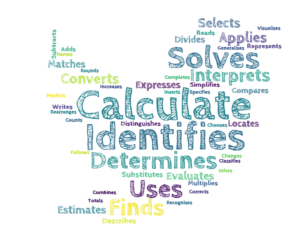

In [90]:
stopwords = set(STOPWORDS)
stopwords.add("said")

wc = WordCloud(background_color="white", max_words=100, mask=bird_mask,min_font_size=5,font_step=2,
               stopwords=stopwords,collocations = False,font_path='CabinSketch-Bold.otf' )
# generate word cloud
wc.generate(str1)

# store to file
wc.to_file( "verbs.png")

# show
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()